# MTA Exploratory Data Analysis

- By: Muneera Alshunaifi

## Introduction

> A lot of people in New York using The Metropolitan Transportation subways as main way for transportation. The MTA says that it is serving a population of 15.3 million people across a 5,000-square-mile travel area surrounding New York City through Long Island, southeastern New York State, and Connecticut.Therefore, a huge amount of people causing traffic on stations which is the important factor for us as coffee shop owners who aims to open a coffee shop at one of the MTA stations, but firstly each coffee shop owner shall measure the decision of opening a coffee shop, that is, by posting some ads to notice the intrests of customers and how effective the posters are.

## Problem 

> As coffee shop owners who have limited budget, we want first to measure the decision of opening a coffee shop at one of the MTA stations whether is good and profitable idea or not, in order to do that, we need to post some ads at the stations but we do not want to waiste and utilize huge amount of money on ads posters. However, we want to use few amounts of ads in which it can be affective and attractive to the targeted customers.

## Solution 

> I decided to utilize a solution that hopefully will help coffee shop owners targeting the suitable stations for posting the ads. To do so, I willl be investigating and analyzing the MTA data to see which station are the busiest and most crowded, also, I want to measure COVID-19 effect on the Metropolitan Transportation stations in order to know 
how to deal with related phenomena while opening the coffee shop in the future.

**I will use the Metropolitan Transportation Authority dataset which i acquired from their website: http://web.mta.info/developers/turnstile.html
The MTA data records are weekly produced and mainly collected 
every 4 hours.
To carry out the insights, I will use the data of six months starting from October 2020 
until March 2021.**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates

%matplotlib inline

### Collecting Data

In [188]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210605, 210612, 210619, 210626, 210703, 210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828]

turnstiles_df = get_data(week_nums)

In [189]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


In [190]:
# Here we will list the columns 
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [191]:
# shape of the data
turnstiles_df.shape

(2722610, 11)

In [192]:
turnstiles_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722610 entries, 0 to 209067
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   2722610 non-null  object
 1   UNIT                                                                  2722610 non-null  object
 2   SCP                                                                   2722610 non-null  object
 3   STATION                                                               2722610 non-null  object
 4   LINENAME                                                              2722610 non-null  object
 5   DIVISION                                                              2722610 non-null  object
 6   DATE                                                                  2722610 non-n

<ipython-input-192-aaf6c11ca5e4>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  turnstiles_df.info(verbose=True, null_counts=True)


In [193]:
# Check for null values
turnstiles_df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [194]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2722610.000000,2722610.000000
mean,41682478.283552,33299464.892429
std,218514611.098471,191970607.404345
min,0.000000,0.000000
25%,217923.250000,99443.250000
50%,1405620.000000,855244.000000
75%,6023156.750000,3968192.500000
max,2147416896.000000,2122890258.000000


**After viewing and studying the dataset we figure out the following:**

- Turnstile count is recorded in a cumulative manner, indicating that data recorded increases constantly over time.
- Dataset does not include day of the week (e.g. Sunday) so we will add 'DAY' column
- Adding a Turnstile column instead of multiple columns that refers to one turnstile will be helpful for further analysis and visualization
- We want to focus on regular audits rather than the recovered audits. To accomplish this, we will apply a mask to the frame.
- Adding `DAILY_ENTRIES`, `DAILY_EXITS`,`DAILY_TRAFFIC` coulmns will be helpful
- Adding `STATION_NAME` column is a good idea for ads!

### Data Cleaning & Analysis

In [195]:
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [196]:
# Delete the tab from `EXITS       ` column
turnstiles_df = turnstiles_df.rename(columns={'EXITS                                                               ':"EXITS"})

In [197]:
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [198]:
# Delete duplicates (drop RECOVR AUD from DESC column)
turnstiles_df.DESC.value_counts()

REGULAR       2710456
RECOVR AUD      12154
Name: DESC, dtype: int64

In [199]:
turnstiles_df = turnstiles_df[turnstiles_df['DESC'] == 'REGULAR']

In [200]:
turnstiles_df.DESC.value_counts()

REGULAR    2710456
Name: DESC, dtype: int64

In [201]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'
turnstiles_df['TURNSTILE'] = turnstiles_df['C/A'] + '-' + turnstiles_df['UNIT'] + '-' + turnstiles_df['SCP']

In [202]:
# Filter the data to only daily entries and exits
df_daily = (turnstiles_df.groupby(['TURNSTILE','DATE','STATION','LINENAME']).ENTRIES.max().reset_index())

In [203]:
df_daily['EXITS'] = (turnstiles_df.groupby(['TURNSTILE']).EXITS.max().reset_index().EXITS)

In [204]:
df_daily.head()

,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS
0,A002-R051-02-00-00,05/29/2021,59 ST,NQR456W,7579021,2609102.000000
1,A002-R051-02-00-00,05/30/2021,59 ST,NQR456W,7579275,1540407.000000
2,A002-R051-02-00-00,05/31/2021,59 ST,NQR456W,7579593,5480635.000000
3,A002-R051-02-00-00,06/01/2021,59 ST,NQR456W,7580178,2569924.000000
4,A002-R051-02-00-00,06/02/2021,59 ST,NQR456W,7580754,90927.000000


In [205]:
# Add Daily_entries coulmn by finding the diffrence from ENTRIES column 

df_daily['DAILY_ENTRIES']= df_daily['ENTRIES'].diff()

df_daily.head()

,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS,DAILY_ENTRIES
0,A002-R051-02-00-00,05/29/2021,59 ST,NQR456W,7579021,2609102.000000,NaN
1,A002-R051-02-00-00,05/30/2021,59 ST,NQR456W,7579275,1540407.000000,254.000000
2,A002-R051-02-00-00,05/31/2021,59 ST,NQR456W,7579593,5480635.000000,318.000000
3,A002-R051-02-00-00,06/01/2021,59 ST,NQR456W,7580178,2569924.000000,585.000000
4,A002-R051-02-00-00,06/02/2021,59 ST,NQR456W,7580754,90927.000000,576.000000


In [206]:
# Add Daily_exits coulmn by finding the diffrence from EXITS column
df_daily['DAILY_EXITS']= df_daily['EXITS'].diff()
df_daily.head()

,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS
0,A002-R051-02-00-00,05/29/2021,59 ST,NQR456W,7579021,2609102.000000,NaN,NaN
1,A002-R051-02-00-00,05/30/2021,59 ST,NQR456W,7579275,1540407.000000,254.000000,-1068695.000000
2,A002-R051-02-00-00,05/31/2021,59 ST,NQR456W,7579593,5480635.000000,318.000000,3940228.000000
3,A002-R051-02-00-00,06/01/2021,59 ST,NQR456W,7580178,2569924.000000,585.000000,-2910711.000000
4,A002-R051-02-00-00,06/02/2021,59 ST,NQR456W,7580754,90927.000000,576.000000,-2478997.000000


In [207]:
# Solve the negetive values on Daily_entries and Daily_exits
df_daily['PREV_ENTRIES'] = df_daily['ENTRIES'].shift(1)
df_daily['PREV_EXITS'] = df_daily['EXITS'].shift(1)

In [208]:
def get_daily_counts(row, max_counter, name):
    counter = row[name] - row["PREV_"+name]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row[name], row["PREV_"+name])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=500000, name="ENTRIES")
df_daily["DAILY_EXITS"] = df_daily.apply(get_daily_counts, axis=1, max_counter=500000, name="EXITS")
df_daily.dropna(inplace= True)


Check Results

In [209]:
df_daily[((df_daily.ENTRIES ==0) & (df_daily.DAILY_ENTRIES < 0)) | (df_daily.ENTRIES ==0) & (df_daily.DAILY_EXITS < 0)].head()

,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS


In [210]:
df_daily[((df_daily.ENTRIES != 0) & (df_daily.DAILY_ENTRIES < 0)) | (df_daily.ENTRIES != 0) & (df_daily.DAILY_EXITS < 0)].head()

,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS


In [211]:
# Add Daily_trafic coulmn by using Daily_exits + Daily_entries
df_daily['DAILY_TRAFFIC']= df_daily['DAILY_ENTRIES'] + df_daily['DAILY_EXITS']


In [212]:
df_daily.head()

,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_TRAFFIC
1,A002-R051-02-00-00,05/30/2021,59 ST,NQR456W,7579275,1540407.000000,254.000000,0.000000,7579021.000000,2609102.000000,254.000000
2,A002-R051-02-00-00,05/31/2021,59 ST,NQR456W,7579593,5480635.000000,318.000000,0.000000,7579275.000000,1540407.000000,318.000000
3,A002-R051-02-00-00,06/01/2021,59 ST,NQR456W,7580178,2569924.000000,585.000000,0.000000,7579593.000000,5480635.000000,585.000000
4,A002-R051-02-00-00,06/02/2021,59 ST,NQR456W,7580754,90927.000000,576.000000,90927.000000,7580178.000000,2569924.000000,91503.000000
5,A002-R051-02-00-00,06/03/2021,59 ST,NQR456W,7581328,7047411.000000,574.000000,90927.000000,7580754.000000,90927.000000,91501.000000


In [213]:
df_daily.describe()

,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_TRAFFIC
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000
mean,21527853.671651,33944125.293860,1435.120215,92671.449960,21529352.570175,33944645.327352,94106.570175
std,118550825.688062,193348407.746224,18636.091196,134411.852349,118550601.741570,193348319.940816,135497.472483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128260.250000,117385.250000,164.750000,0.000000,128706.000000,117474.750000,358.750000
50%,1438631.000000,878130.500000,304.000000,12309.000000,1438831.500000,880334.500000,13718.500000
75%,6220017.750000,4007527.750000,470.000000,146559.500000,6220232.250000,4007527.750000,147896.500000
max,885601748.000000,2122890258.000000,491229.000000,499413.000000,885601748.000000,2122890258.000000,578897.000000


In [214]:
# convert date to day_of_week and month
df_daily['DATE'] = pd.to_datetime(df_daily['DATE'])
df_daily['MONTH'] = df_daily['DATE'].apply(lambda x: x.strftime('%B').lower())
# df_daily['DAY'] = df_daily['DATE'].apply(lambda x: x.strftime('%A').lower())

In [215]:
import datetime
df_daily['DAY'] = df_daily[['DATE']]\
    .apply(lambda x: datetime.datetime.strftime(x['DATE'], '%A'), axis=1)

In [216]:
df_daily.head()

,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_TRAFFIC,MONTH,DAY
1,A002-R051-02-00-00,2021-05-30,59 ST,NQR456W,7579275,1540407.000000,254.000000,0.000000,7579021.000000,2609102.000000,254.000000,may,Sunday
2,A002-R051-02-00-00,2021-05-31,59 ST,NQR456W,7579593,5480635.000000,318.000000,0.000000,7579275.000000,1540407.000000,318.000000,may,Monday
3,A002-R051-02-00-00,2021-06-01,59 ST,NQR456W,7580178,2569924.000000,585.000000,0.000000,7579593.000000,5480635.000000,585.000000,june,Tuesday
4,A002-R051-02-00-00,2021-06-02,59 ST,NQR456W,7580754,90927.000000,576.000000,90927.000000,7580178.000000,2569924.000000,91503.000000,june,Wednesday
5,A002-R051-02-00-00,2021-06-03,59 ST,NQR456W,7581328,7047411.000000,574.000000,90927.000000,7580754.000000,90927.000000,91501.000000,june,Thursday


In [217]:
df_daily.DAY.value_counts()

Sunday       719
Wednesday    719
Monday       719
Thursday     719
Tuesday      718
Friday       718
Saturday     704
Name: DAY, dtype: int64

In [218]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5016 entries, 1 to 5016
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TURNSTILE      5016 non-null   object        
 1   DATE           5016 non-null   datetime64[ns]
 2   STATION        5016 non-null   object        
 3   LINENAME       5016 non-null   object        
 4   ENTRIES        5016 non-null   int64         
 5   EXITS          5016 non-null   float64       
 6   DAILY_ENTRIES  5016 non-null   float64       
 7   DAILY_EXITS    5016 non-null   float64       
 8   PREV_ENTRIES   5016 non-null   float64       
 9   PREV_EXITS     5016 non-null   float64       
 10  DAILY_TRAFFIC  5016 non-null   float64       
 11  MONTH          5016 non-null   object        
 12  DAY            5016 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 548.6+ KB


Mean of numerical columns in data

In [220]:
df_daily.mean()

<ipython-input-220-3d13a8ff2500>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_daily.mean()


ENTRIES         21527853.671651
EXITS           33944125.293860
DAILY_ENTRIES       1435.120215
DAILY_EXITS        92671.449960
PREV_ENTRIES    21529352.570175
PREV_EXITS      33944645.327352
DAILY_TRAFFIC      94106.570175
dtype: float64

Variance for each numerical column in the data

In [238]:
df_daily.var()

ENTRIES         14054298271321338.000000
EXITS           37383606778000184.000000
DAILY_ENTRIES           347303895.048962
DAILY_EXITS           18066546051.766121
DAILY_TRAFFIC         18359565049.194412
dtype: float64

In [221]:
#drop unwanted columns
df_daily.drop(['PREV_EXITS', 'PREV_ENTRIES'], axis='columns', inplace=True)

Plot the distribution of the Daily Traffic

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


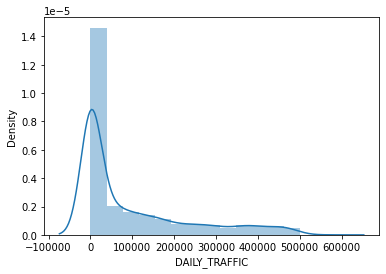

In [226]:
sns.distplot(df_daily["DAILY_TRAFFIC"],kde=True,bins=15);

The distribution of the daily traffic is abnormal and negatively-skewed

In [277]:
df_daily['STATION'].value_counts()

57 ST-7 AV    1820
5 AV/59 ST    1260
59 ST         1091
49 ST          845
Name: STATION, dtype: int64

In [278]:
#define function to name stations based on STATION column
def f(row):
    if row['STATION'] == '57 ST-7 AV':
        val = '57th St-Seventh Avenue'
    elif row['STATION'] == '5 AV/59 ST':
        val = '5th Avenue & Central Park'
    elif row['STATION'] =='59 ST':
        val = '59th Street'
    else:
        val = '49th St & Times Square'
    return val

#create new column refers to the station name
df_daily['STATION_NAME'] = df_daily.apply(f, axis=1)

In [284]:
df_daily['STATION_NAME'].value_counts()

57th St-Seventh Avenue       1820
5th Avenue & Central Park    1260
59th Street                  1091
49th St & Times Square        845
Name: STATION_NAME, dtype: int64

**Using SQL to get more statstics**

In [239]:
from sqlalchemy import create_engine

eng= create_engine('sqlite://', echo=False)
df_daily.to_sql("mta", con=eng)

In [241]:
x=pd.read_sql('SELECT * FROM mta limit 5;', eng)
x

,index,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC,MONTH,DAY
0,1,A002-R051-02-00-00,2021-05-30 00:00:00.000000,59 ST,NQR456W,7579275,1540407.000000,254.000000,0.000000,254.000000,may,Sunday
1,2,A002-R051-02-00-00,2021-05-31 00:00:00.000000,59 ST,NQR456W,7579593,5480635.000000,318.000000,0.000000,318.000000,may,Monday
2,3,A002-R051-02-00-00,2021-06-01 00:00:00.000000,59 ST,NQR456W,7580178,2569924.000000,585.000000,0.000000,585.000000,june,Tuesday
3,4,A002-R051-02-00-00,2021-06-02 00:00:00.000000,59 ST,NQR456W,7580754,90927.000000,576.000000,90927.000000,91503.000000,june,Wednesday
4,5,A002-R051-02-00-00,2021-06-03 00:00:00.000000,59 ST,NQR456W,7581328,7047411.000000,574.000000,90927.000000,91501.000000,june,Thursday


In [248]:
st=pd.read_sql('SELECT STATION, sum(DAILY_TRAFFIC) as TRAFFIC FROM mta GROUP BY STATION ORDER BY TRAFFIC DESC limit 4;', eng)
st

,STATION,TRAFFIC
0,57 ST-7 AV,171848931.000000
1,5 AV/59 ST,122045637.000000
2,59 ST,102547068.000000
3,49 ST,75596920.000000


'57 ST-7 AV' station is the most crowded among the 4 stations

In [253]:
s=pd.read_sql('SELECT STATION,MONTH, sum(DAILY_TRAFFIC) as TRAFFIC FROM mta GROUP BY STATION ORDER BY TRAFFIC DESC;', eng)
s

,STATION,MONTH,TRAFFIC
0,57 ST-7 AV,may,171848931.000000
1,5 AV/59 ST,may,122045637.000000
2,59 ST,may,102547068.000000
3,49 ST,may,75596920.000000


In [247]:
s=pd.read_sql('SELECT STATION, DAY, avg(DAILY_TRAFFIC) as AVG_TRAFFIC FROM mta GROUP BY STATION, DAY ORDER BY AVG_TRAFFIC DESC limit 4;', eng)
s

,STATION,DAY,AVG_TRAFFIC
0,5 AV/59 ST,Sunday,108115.868132
1,49 ST,Friday,107456.450000
2,5 AV/59 ST,Monday,106913.450549
3,57 ST-7 AV,Thursday,105682.530769


Sunday is meanly the busiest day, I believe because it is a vacation day where people mostly visits and gather with their families.

### Data Visualization

In [102]:
# to see numbers on better format
pd.set_option('float_format', '{:2f}'.format)

In [103]:
# Group by to find trafic for Top 5 stations
df_station = df_daily.groupby(['STATION']).DAILY_TRAFFIC.sum().reset_index().sort_values(['DAILY_TRAFFIC'],ascending=False).head()

In [104]:
# Group by to find trafic for Bottom 5 stations
df_station_tail = df_daily.groupby(['STATION']).DAILY_TRAFFIC.sum().reset_index().sort_values(['DAILY_TRAFFIC'],ascending=False).tail()

In [105]:
# Group by to find trafic for each station and Date
df_station_day =  df_daily.groupby(['STATION','DATE']).DAILY_TRAFFIC.sum().reset_index()

In [153]:
# Group by to find trafic for each station and turnstile
df_turn =  df_daily.groupby(['STATION','TURNSTILE']).DAILY_TRAFFIC.sum().reset_index().sort_values(['DAILY_TRAFFIC'],ascending=False)

#Filter on mpst crowded station
df_turn=df_turn[df_turn["STATION"]=="57 ST-7 AV"]

In [107]:
# To find the top 4 stations
x = df_station.STATION.tolist()

In [108]:
# Filter the dataframe for top 5 stations
boolean_series = df_station_day.STATION.isin(x)
df_station_day = df_station_day[boolean_series]

In [109]:
# drop the first day since it has a lot of missing entries for trafic
df_station_day = df_station_day[ df_station_day['DATE'] != '2021-05-29']

**Comparison between the top 4 Stations for 3 months.**

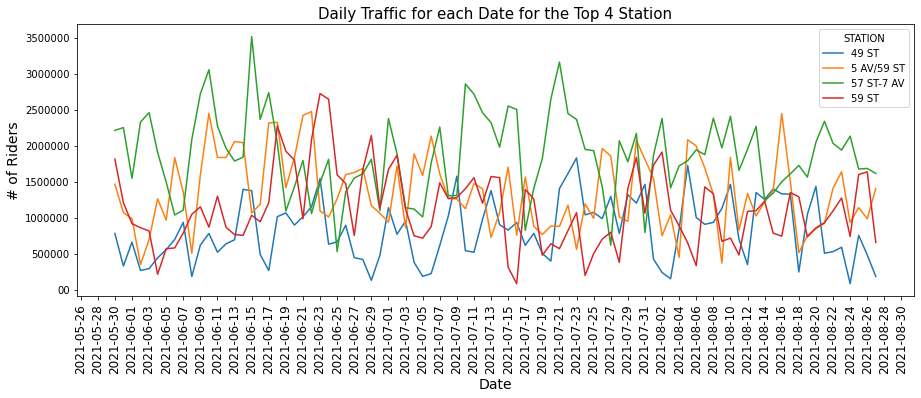

In [283]:
plt.figure(figsize = [15,5]);
axx = sns.lineplot(data=df_station_day,x='DATE',y='DAILY_TRAFFIC',hue='STATION',  ci=None,);
plt.xlabel('Date', fontsize = '14');
plt.ylabel('# of Riders',  fontsize = '14');
plt.title('Daily Traffic for each Date for the Top 4 Station',fontsize = '15');
axx.xaxis.set_major_locator(mdates.DayLocator(interval=2))
axx.yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
plt.xticks(rotation = 90, fontsize = '12');

From here we can see that `57 ST-7 AV` station was the busiest station and it reach huge amount of riders at 17/6/2021 and 23/7/2021.

So i will prefer posting ads on 57 ST-7 AV station


**Comparing top 4 stations by their daily traffic**

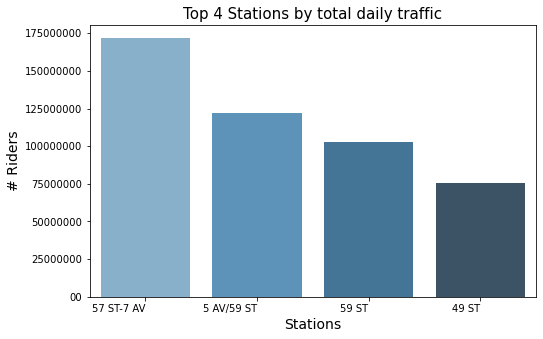

In [254]:
plt.figure(figsize = [8,5]);
ax =sns.barplot(data=df_station,x='STATION',y='DAILY_TRAFFIC',palette="Blues_d",ci=None);
plt.xlabel('Stations',  fontsize = '14');
plt.ylabel('# Riders',  fontsize = '14');
plt.title('Top 4 Stations by total daily traffic',  fontsize = '15');
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
plt.xticks(rotation=0, ha='right');

# fig, axes = plt.subplots(1, 2)
# fig.set_figwidth(20)

# axes[0].set_title("Top 4 Stations by Total Traffic",  fontsize = '16')
# axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
# sns.barplot(ax=axes[0],data=df_station,x='STATION',y='DAILY_TRAFFIC', palette="Blues_d" ,ci=None);

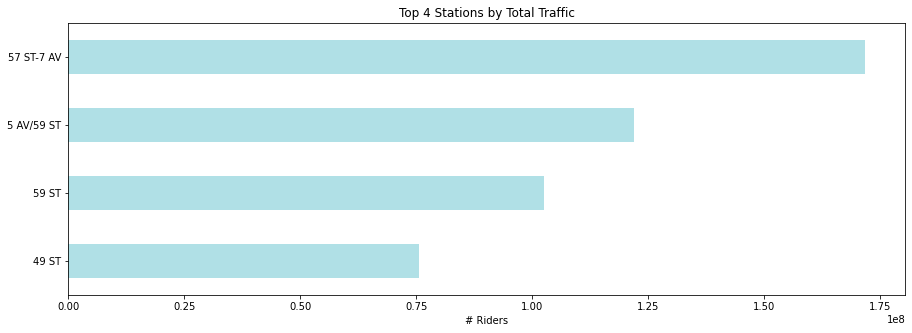

In [259]:
top_10 =df_daily.groupby(['STATION']).agg({'DAILY_TRAFFIC': sum}).sort_values(by = 'DAILY_TRAFFIC', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(15, 5))
top_10.sort_values(by = 'DAILY_TRAFFIC',ascending=True).plot(kind='barh', color ='powderblue',ax=ax)
ax.set(title='Top 4 Stations by Total Traffic', xlabel='# Riders', ylabel='')
ax.legend().set_visible(False)

We can ensure from above plots that `57 ST-7 AV` has most daily traffic, hence, it is the most crowded station.

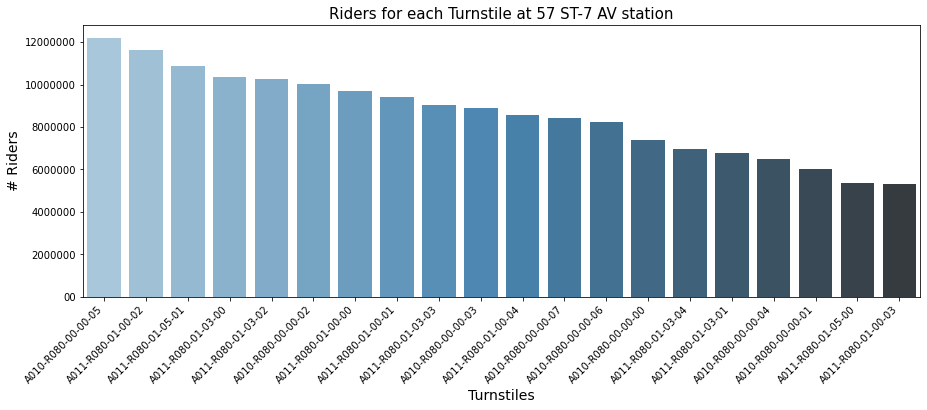

In [260]:
plt.figure(figsize = [15,5]);
ax =sns.barplot(data=df_turn,x='TURNSTILE',y='DAILY_TRAFFIC',palette="Blues_d",ci=None);
plt.xlabel('Turnstiles',  fontsize = '14');
plt.ylabel('# Riders',  fontsize = '14');
plt.title('Riders for each Turnstile at 57 ST-7 AV station',  fontsize = '15');
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
plt.xticks(rotation=45, ha='right');

The Turnstile `A010-R080-00-00-05` has most Entries and Exits So number of Riders for this Turnstile are greater than other Turnstiles.

In [261]:
df_daily.head(3)

,TURNSTILE,DATE,STATION,LINENAME,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC,MONTH,DAY
1,A002-R051-02-00-00,2021-05-30,59 ST,NQR456W,7579275,1540407.000000,254.000000,0.000000,254.000000,may,Sunday
2,A002-R051-02-00-00,2021-05-31,59 ST,NQR456W,7579593,5480635.000000,318.000000,0.000000,318.000000,may,Monday
3,A002-R051-02-00-00,2021-06-01,59 ST,NQR456W,7580178,2569924.000000,585.000000,0.000000,585.000000,june,Tuesday


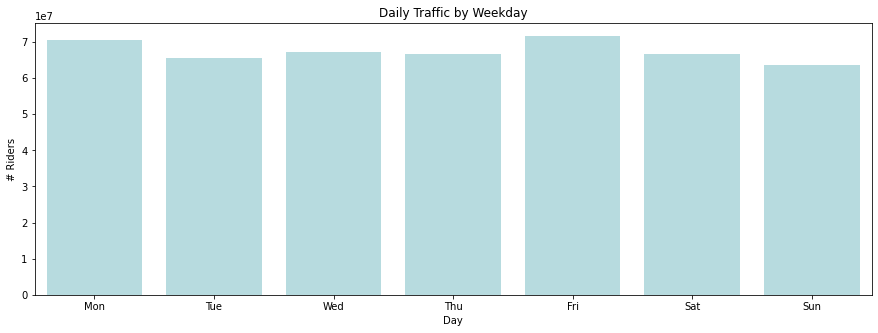

In [274]:
fig, axs = plt.subplots(nrows=1,figsize=(15,5))

sns.barplot(data = df_daily.groupby('DAY').sum().reset_index(), x='DAY', y='DAILY_TRAFFIC', color="powderblue",ax=axs, label="Traffic").set(title='Daily Traffic by Weekday', xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], xlabel='Day', ylabel='# Riders');

axs = plt.gca()

In [275]:
df_daily['MONTH'].value_counts()

july      1691
june      1673
august    1485
may        167
Name: MONTH, dtype: int64

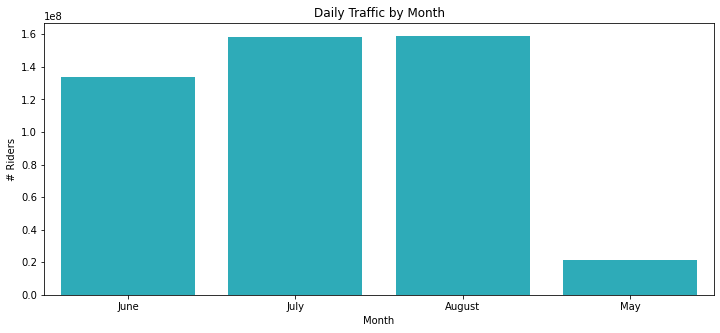

In [276]:
fig, axs = plt.subplots(figsize=(12,5))

sns.barplot(data = df_daily.groupby('MONTH').sum().reset_index(), x='MONTH', y='DAILY_TRAFFIC', color=sns.color_palette()[9],ax=axs, label="Traffic").set(title='Daily Traffic by Month', xticklabels=['June','July','August','May'], xlabel='Month', ylabel='# Riders');

axs = plt.gca()

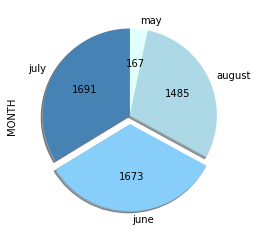

In [297]:
#plot pie chart of day type column
mont = df_daily['MONTH'].value_counts()
colors=['steelblue','lightskyblue','lightblue','lightcyan']
mont.plot.pie(autopct=lambda x: '{:.0f}'.format(x*mont.sum()/100) ,colors=colors, shadow=True, startangle=90, explode=(0, 0.1, 0, 0));

The month where people use metro stations the most is July which make sense bacause it usually consider summer vacation in U.S, NYC where people travel and go out with their families and friends more than rest of months, thus they use metro stations more.

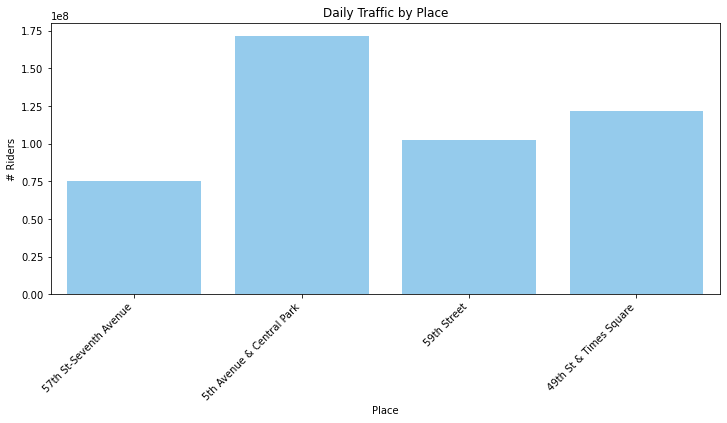

In [299]:
fig, axs = plt.subplots(figsize=(12,5))

sns.barplot(data = df_daily.groupby('STATION_NAME').sum().reset_index(), x='STATION_NAME', y='DAILY_TRAFFIC', color='lightskyblue',ax=axs, label="Traffic").set(title='Daily Traffic by Place', xticklabels=['57th St-Seventh Avenue','5th Avenue & Central Park','59th Street','49th St & Times Square'], xlabel='Place', ylabel='# Riders');
plt.xticks(rotation=45, ha='right');
#axs = plt.gca()

"5th Avenue & Central Park" is the most crowded place and "49th St & Times Square" is the second most crowded. hence, we can focus on those places to post our ads.

## Conclusion

> After analyzing MTA data we can conclude the following:
   - `57 ST-7 AV` is the most crowded station
   - The Turnstile `A010-R080-00-00-05` has most Entries and Exits
   - `5th Avenue & Central Park` and `49th St & Times Square` are most crowded places recording to our data
   -  Recording to our data, most of riders were visiting metro station at July.
   -  The Traffic mostly falls at August
   -  Friday is the day where most traffic occur.

## Limitation

> Due to time limitation I couldn't analyze the impact of COVID-19